In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
pwd

'/home/xz9'

In [61]:
###set path, get labels
directory = './train'

import shutil
for root, dirs, files in os.walk('train'):
    for d in dirs:
        shutil.rmtree(os.path.join(root, d))

filepath = []
category = []
for image in os.listdir('train'):
    path = os.path.join(directory, image)
    image_name = image.split('.')[0]
    filepath.append(path)
    category.append(image_name)
category = [1 if i == 'dog' else 0 for i in category]
df = pd.DataFrame({"filepath":filepath,"category":category})
df.head(3)

,filepath,category
0,./train/cat.3274.jpg,0
1,./train/cat.8025.jpg,0
2,./train/cat.6654.jpg,0


In [62]:
####check the number of dogs and cats
df.groupby('category').count()

,filepath
category,
0,12500
1,12500


In [63]:
### choose 1000 images as sample randomly
# df = df.sample(n=500,  random_state=2019)
# df.head(3)

In [64]:
# df.groupby('category').count()

In [65]:
## get array of every image
## we use the grey scale
from PIL import Image
image_size = 80
x_data = []
for image in df.filepath:
    im = Image.open(image).convert('L')
#     im = Image.open(image)
#     print(im.format, im.size, im.mode)
    img = im.resize((image_size, image_size))
    x_data.append(np.array(img))
x_data = np.array(x_data)
x_data.shape

(25000, 80, 80)

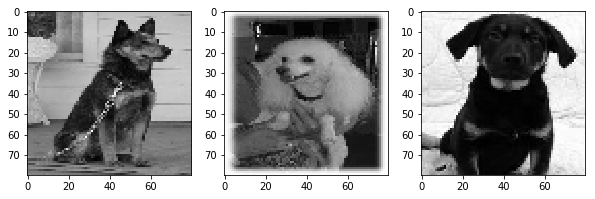

In [68]:
### plot 3 images
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
j = 1
for i in range(150,153):
    plt.subplot(1,3,j)
    plt.imshow(x_data[i],cmap = 'gist_gray')
    j = j + 1

In [48]:
x_data = x_data.flatten().reshape(25000, 6400)
y_data = df.category
x_data.shape

(25000, 6400)

In [49]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
x_data = normalize(x_data, norm='max', axis=0)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state = 2019)
print(x_train[0:3])
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

[[0.31764706 0.17254902 0.38431373 ... 0.69803922 0.43137255 0.43921569]
 [0.75686275 0.75686275 0.76862745 ... 0.63529412 0.6        0.58823529]
 [0.45882353 0.50196078 0.50588235 ... 0.41176471 0.39607843 0.43137255]]
(5000, 6400)
(20000,)
(5000,)


# logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logistic_model.score(x_train, y_train)

0.7699

In [14]:
logistic_model.score(x_test, y_test)

0.5306

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

1.0
0.6406


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

1.0
0.6436


[[1686  838]
 [ 944 1532]]


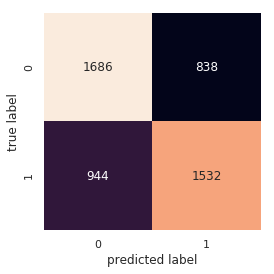

In [13]:
###confusion matrix for test
from sklearn import metrics
import seaborn as sns; sns.set() 
rfc_pred = rfc.predict(x_test)
cm = metrics.confusion_matrix(y_test, rfc_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(2),yticklabels=range(2))
print(cm) 
plt.ylabel('true label')
plt.xlabel('predicted label');

# Deep learning

In [14]:
# !pip install keras

In [15]:
# !pip install tensorflow

In [8]:
import keras
from keras import layers

Using TensorFlow backend.


In [17]:
model = keras.Sequential()

model.add(keras.layers.Dense(30,input_dim = 6400,activation = "relu"))
model.add(keras.layers.Dense(20,activation = "relu"))
model.add(keras.layers.Dense(15,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "relu"))
model.add(keras.layers.Dense(8,activation = "relu"))

model.add(keras.layers.Dense(1,activation = "sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=300, batch_size=1000, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 4s 188us/step - loss: 0.6901 - acc: 0.5358 - val_loss: 0.6866 - val_acc: 0.5536
Epoch 2/300
20000/20000 [==============================] - 2s 84us/step - loss: 0.6809 - acc: 0.5815 - val_loss: 0.6780 - val_acc: 0.5810
Epoch 3/300
20000/20000 [==============================] - 2s 83us/step - loss: 0.6730 - acc: 0.5929 - val_loss: 0.6705 - val_acc: 0.5948
Epoch 4/300
20000/20000 [==============================] - 2s 82us/step - loss: 0.6667 - acc: 0.5991 - val_loss: 0.6712 - val_acc: 0.5814
Epoch 5/300
20000/20000 [==============================] - 2s 81us/step - loss: 0.6666 - acc: 0.5965 - val_loss: 0.6708 - val_acc: 0.5876
Epoch 6/300
20000/20000 [==============================] - 2s 78us/step - loss: 0.6631 - acc: 0.5993 - val_loss: 0.6630 - val_acc: 0.5940
Epoch 7/300
20000/20000 [==============================] - 2s 78us/step - 

In [20]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 1s 54us/step
[0.36833283078670503, 0.84645]
5000/5000 [==============================] - 0s 58us/step
[0.8166441002845765, 0.601]


In [24]:
model = keras.Sequential()

model.add(keras.layers.Dense(100,input_dim = 6400,activation = "relu"))
model.add(keras.layers.Dense(90,activation = "relu"))
model.add(keras.layers.Dense(80,activation = "relu"))
model.add(keras.layers.Dense(70,activation = "relu"))
model.add(keras.layers.Dense(60,activation = "relu"))

model.add(keras.layers.Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=300, batch_size=1000, validation_data=(x_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 2s 124us/step - loss: 0.6858 - acc: 0.5520 - val_loss: 0.6780 - val_acc: 0.5688
Epoch 2/300
20000/20000 [==============================] - 2s 91us/step - loss: 0.6722 - acc: 0.5882 - val_loss: 0.6687 - val_acc: 0.5932
Epoch 3/300
20000/20000 [==============================] - 2s 90us/step - loss: 0.6650 - acc: 0.6006 - val_loss: 0.6666 - val_acc: 0.5932
Epoch 4/300
20000/20000 [==============================] - 2s 93us/step - loss: 0.6583 - acc: 0.6092 - val_loss: 0.6603 - val_acc: 0.5998
Epoch 5/300
20000/20000 [==============================] - 2s 93us/step - loss: 0.6548 - acc: 0.6155 - val_loss: 0.6573 - val_acc: 0.6044
Epoch 6/300
20000/20000 [==============================] - 2s 93us/step - loss: 0.6514 - acc: 0.6220 - val_loss: 0.6578 - val_acc: 0.6040
Epoch 7/300
20000/20000 [==============================] - 2s 94us/step - loss: 0.6480 - acc: 0.6249 - val_loss: 0.6556 - 

In [25]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 1s 70us/step
[0.023047267774119973, 0.9978]
5000/5000 [==============================] - 0s 74us/step
[2.223492342567444, 0.6054]


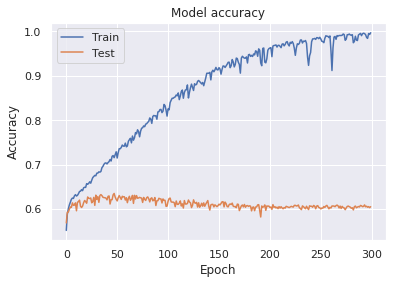

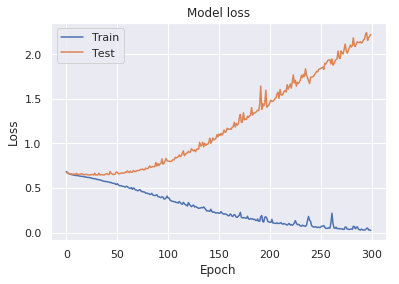

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

Since the model is overfitting, we add the regularizers.

In [31]:
model = keras.Sequential()
from keras import regularizers
model.add(keras.layers.Dense(100,input_dim = 6400,activation = "relu"))
model.add(keras.layers.Dense(90,activation = "relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(80,activation = "relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(70,activation = "relu",kernel_regularizer=regularizers.l2(0.05)))
model.add(keras.layers.Dense(60,activation = "relu",kernel_regularizer=regularizers.l2(0.1)))

model.add(keras.layers.Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=300, batch_size=1000, validation_data=(x_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 3s 142us/step - loss: 12.5185 - acc: 0.5330 - val_loss: 12.3361 - val_acc: 0.5406
Epoch 2/300
20000/20000 [==============================] - 2s 91us/step - loss: 12.1660 - acc: 0.5824 - val_loss: 11.9872 - val_acc: 0.5834
Epoch 3/300
20000/20000 [==============================] - 2s 92us/step - loss: 11.8258 - acc: 0.5990 - val_loss: 11.6538 - val_acc: 0.5932
Epoch 4/300
20000/20000 [==============================] - 2s 91us/step - loss: 11.4986 - acc: 0.6077 - val_loss: 11.3351 - val_acc: 0.5960
Epoch 5/300
20000/20000 [==============================] - 2s 93us/step - loss: 11.1817 - acc: 0.6144 - val_loss: 11.0236 - val_acc: 0.5996
Epoch 6/300
20000/20000 [==============================] - 2s 93us/step - loss: 10.8767 - acc: 0.6139 - val_loss: 10.7257 - val_acc: 0.6036
Epoch 7/300
20000/20000 [==============================] - 2s 90us/step - loss: 10.5834 - acc: 0.6127 - val_lo

In [32]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 1s 69us/step
[0.5469111267566681, 0.83755]
5000/5000 [==============================] - 0s 75us/step
[0.9811184693336487, 0.6154]


In [33]:
print(model.evaluate(x_test,y_test))

5000/5000 [==============================] - 0s 70us/step
[0.9811184693336487, 0.6154]


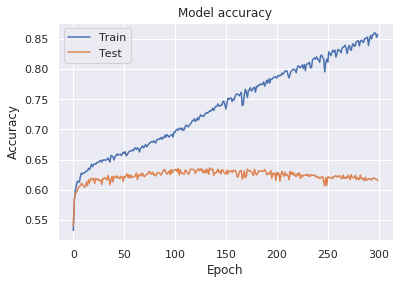

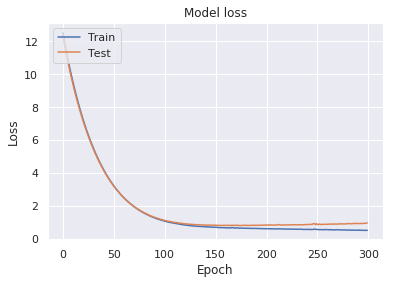

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [12]:
model = keras.Sequential()
from keras import regularizers
model.add(keras.layers.Dense(600,input_dim = 6400,activation = "relu"))
model.add(keras.layers.Dense(500,activation = "relu"))
model.add(keras.layers.Dense(400,activation = "relu"))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(200,activation = "relu"))

model.add(keras.layers.Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=300, batch_size=1500, validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 3s 159us/step - loss: 0.6920 - acc: 0.5387 - val_loss: 0.6846 - val_acc: 0.5402
Epoch 2/300
20000/20000 [==============================] - 3s 137us/step - loss: 0.6761 - acc: 0.5699 - val_loss: 0.6675 - val_acc: 0.5944
Epoch 3/300
20000/20000 [==============================] - 3s 138us/step - loss: 0.6629 - acc: 0.6037 - val_loss: 0.6600 - val_acc: 0.6058
Epoch 4/300
20000/20000 [==============================] - 3s 138us/step - loss: 0.6553 - acc: 0.6126 - val_loss: 0.6559 - val_acc: 0.6050
Epoch 5/300
20000/20000 [==============================] - 3s 136us/step - loss: 0.6481 - acc: 0.6240 - val_loss: 0.6524 - val_acc: 0.6136
Epoch 6/300
20000/20000 [==============================] - 3s 137us/step - loss: 0.6432 - acc: 0.6257 - val_loss: 0.6521 - val_acc: 0.61

In [13]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 3s 138us/step
[0.02067968659326434, 0.99785]
5000/5000 [==============================] - 1s 146us/step
[2.2515947959899902, 0.6246]


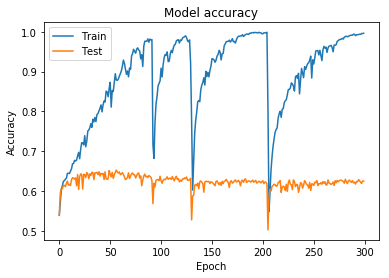

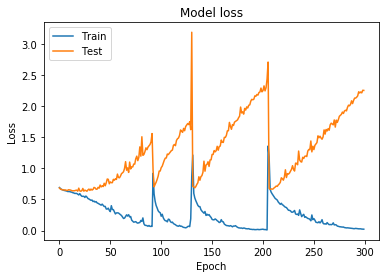

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

From the learning curve, we can know the learning rate is too big, so we lower the learning rate.

In [15]:
model = keras.Sequential()
from keras import regularizers
model.add(keras.layers.Dense(600,input_dim = 6400,activation = "relu"))
model.add(keras.layers.Dense(500,activation = "relu"))
model.add(keras.layers.Dense(400,activation = "relu"))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(200,activation = "relu"))

model.add(keras.layers.Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=0.000001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=300, batch_size=1500, validation_data=(x_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 3s 171us/step - loss: 0.6987 - acc: 0.4997 - val_loss: 0.6964 - val_acc: 0.4958
Epoch 2/300
20000/20000 [==============================] - 3s 155us/step - loss: 0.6951 - acc: 0.4975 - val_loss: 0.6942 - val_acc: 0.4952
Epoch 3/300
20000/20000 [==============================] - 3s 155us/step - loss: 0.6933 - acc: 0.5038 - val_loss: 0.6928 - val_acc: 0.5020
Epoch 4/300
20000/20000 [==============================] - 3s 155us/step - loss: 0.6918 - acc: 0.5221 - val_loss: 0.6915 - val_acc: 0.5234
Epoch 5/300
20000/20000 [==============================] - 3s 154us/step - loss: 0.6904 - acc: 0.5417 - val_loss: 0.6904 - val_acc: 0.5396
Epoch 6/300
20000/20000 [==============================] - 3s 154us/step - loss: 0.6891 - acc: 0.5519 - val_loss: 0.6894 - val_acc: 0.5436
Epoch 7/300
20000/20000 [==============================] - 3s 155us/step - loss: 0.6880 - acc: 0.5607 - val_loss: 0.6

In [16]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 3s 133us/step
[0.5900006000041962, 0.69425]
5000/5000 [==============================] - 1s 132us/step
[0.6363173444747925, 0.636]


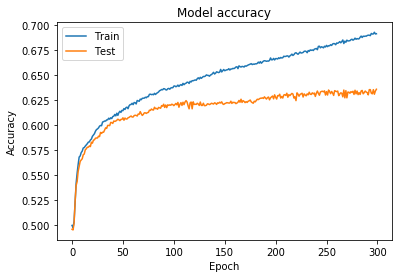

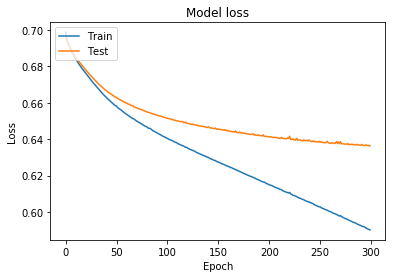

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

[[1589  935]
 [ 885 1591]]


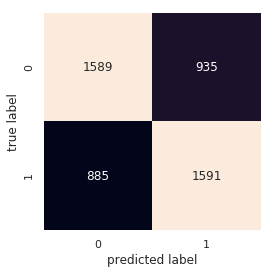

In [19]:
from sklearn import metrics
import seaborn as sns; sns.set() 
predictions = model.predict_classes(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(2),yticklabels=range(2))
print(cm) 
plt.ylabel('true label')
plt.xlabel('predicted label');

We try to add more laters, more neurons.

In [9]:
model = keras.Sequential()
from keras import regularizers
model.add(keras.layers.Dense(900,input_dim = 6400,activation = "relu"))
model.add(keras.layers.Dense(800,activation = "relu"))
model.add(keras.layers.Dense(600,activation = "relu"))
model.add(keras.layers.Dense(500,activation = "relu"))
model.add(keras.layers.Dense(400,activation = "relu"))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(200,activation = "relu"))
model.add(keras.layers.Dense(200,activation = "relu"))


model.add(keras.layers.Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=0.000001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=300, batch_size=1500, validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 7s 366us/step - loss: 0.6928 - acc: 0.5228 - val_loss: 0.6928 - val_acc: 0.5194
Epoch 2/300
20000/20000 [==============================] - 4s 220us/step - loss: 0.6922 - acc: 0.5329 - val_loss: 0.6924 - val_acc: 0.5234
Epoch 3/300
20000/20000 [==============================] - 4s 218us/step - loss: 0.6917 - acc: 0.5452 - val_loss: 0.6920 - val_acc: 0.5362
Epoch 4/300
20000/20000 [==============================] - 4s 219us/step - loss: 0.6912 - acc: 0.5576 - val_loss: 0.6916 - val_acc: 0.5476
Epoch 5/300
20000/20000 [==============================] - 4s 218us/step - loss: 0.6907 - acc: 0.5659 - val_loss: 0.6911 - val_acc: 0.5520
Epoch 6/300
20000/20000 [==============================] - 4s 217us/step - loss: 0.6901 - acc: 0.5728 - val_loss: 0.6907 - val_acc: 0.56

In [10]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 5s 226us/step
[0.5256581666946412, 0.74435]
5000/5000 [==============================] - 1s 225us/step
[0.6357493339538575, 0.647]


In [12]:
model = keras.Sequential()
from keras import regularizers
model.add(keras.layers.Dense(1500,input_dim = 6400,activation = "relu"))
model.add(keras.layers.Dense(1400,activation = "relu"))
model.add(keras.layers.Dense(1300,activation = "relu"))
model.add(keras.layers.Dense(1300,activation = "relu"))
model.add(keras.layers.Dense(1200,activation = "relu"))
model.add(keras.layers.Dense(1200,activation = "relu"))
model.add(keras.layers.Dense(1000,activation = "relu"))
model.add(keras.layers.Dense(1000,activation = "relu"))
model.add(keras.layers.Dense(900,activation = "relu"))
model.add(keras.layers.Dense(900,activation = "relu"))
model.add(keras.layers.Dense(800,activation = "relu"))
model.add(keras.layers.Dense(800,activation = "relu"))
model.add(keras.layers.Dense(700,activation = "relu"))
model.add(keras.layers.Dense(600,activation = "relu"))
model.add(keras.layers.Dense(600,activation = "relu"))
model.add(keras.layers.Dense(500,activation = "relu"))
model.add(keras.layers.Dense(500,activation = "relu"))



model.add(keras.layers.Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=0.000001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=300, batch_size=1500, validation_data=(x_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 14s 709us/step - loss: 0.6931 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.4952
Epoch 2/300
20000/20000 [==============================] - 13s 640us/step - loss: 0.6931 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.4952
Epoch 3/300
20000/20000 [==============================] - 13s 639us/step - loss: 0.6930 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.4952
Epoch 4/300
20000/20000 [==============================] - 13s 634us/step - loss: 0.6930 - acc: 0.5023 - val_loss: 0.6930 - val_acc: 0.4988
Epoch 5/300
20000/20000 [==============================] - 13s 638us/step - loss: 0.6929 - acc: 0.5080 - val_loss: 0.6929 - val_acc: 0.5064
Epoch 6/300
20000/20000 [==============================] - 13s 638us/step - loss: 0.6927 - acc: 0.5184 - val_loss: 0.6928 - val_acc: 0.5238
Epoch 7/300
20000/20000 [==============================] - 13s 633us/step - loss: 0.6926 - acc: 0.5387 - val_lo

In [13]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 11s 543us/step
[0.2068071208000183, 0.9327]
5000/5000 [==============================] - 3s 525us/step
[0.9693510506629944, 0.6342]


# CNN

We used color images to feed the CNN model.

In [3]:
###set path, get labels
directory = './train'

import shutil
for root, dirs, files in os.walk('train'):
    for d in dirs:
        shutil.rmtree(os.path.join(root, d))

filepath = []
category = []
for image in os.listdir('train'):
    path = os.path.join(directory, image)
    image_name = image.split('.')[0]
    filepath.append(path)
    category.append(image_name)
category = [1 if i == 'dog' else 0 for i in category]
df = pd.DataFrame({"filepath":filepath,"category":category})

In [4]:
from PIL import Image
image_size = 80
x_data = []
for image in df.filepath:
    im = Image.open(image)
#     im = Image.open(image)
#     print(im.format, im.size, im.mode)
    img = im.resize((image_size, image_size))
    x_data.append(np.array(img))
x_data = np.array(x_data)
print(x_data.shape)

(25000, 80, 80, 3)


In [5]:
y_data = df.category

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state = 2019)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(20000, 80, 80, 3)
(5000, 80, 80, 3)
(20000,)


In [7]:
x_train = x_train/255
x_test = x_test/255


In [8]:
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Using TensorFlow backend.


In [9]:
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(600, activation='relu'))


model.add(Dense(1, activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.fit(x_train, y_train, batch_size=500, epochs=35,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/35
20000/20000 [==============================] - 308s 15ms/step - loss: 0.6778 - acc: 0.5565 - val_loss: 0.6463 - val_acc: 0.6108
Epoch 2/35
20000/20000 [==============================] - 305s 15ms/step - loss: 0.6389 - acc: 0.6256 - val_loss: 0.6171 - val_acc: 0.6562
Epoch 3/35
20000/20000 [==============================] - 315s 16ms/step - loss: 0.5977 - acc: 0.6749 - val_loss: 0.6188 - val_acc: 0.6432
Epoch 4/35
20000/20000 [==============================] - 306s 15ms/step - loss: 0.5648 - acc: 0.7067 - val_loss: 0.5458 - val_acc: 0.7276
Epoch 5/35
20000/20000 [==============================] - 305s 15ms/step - loss: 0.5206 - acc: 0.7426 - val_loss: 0.5247 - val_acc: 0.7446
Epoch 6/35
20000/20000 [==============================] - 306s 15ms/step - loss: 0.4796 - acc: 0.7674 - val_loss: 0.4858 - val_acc: 0.7664
Epoch 7/35
20000/20000 [==============================] - 307s 15ms/s

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 77, 77, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        51264     
__________

In [15]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 86s 4ms/step
[0.00040498225062619896, 1.0]
5000/5000 [==============================] - 21s 4ms/step
[0.9373883268833161, 0.8624]


[[2153  371]
 [ 317 2159]]


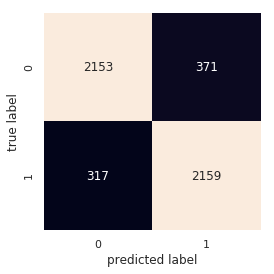

In [16]:
predictions = model.predict_classes(x_test)
from sklearn import metrics
import seaborn as sns; sns.set() 
cm = metrics.confusion_matrix(y_test, predictions)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(2),yticklabels=range(2))
print(cm) 
plt.ylabel('true label')
plt.xlabel('predicted label');

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86      2524
          1       0.85      0.87      0.86      2476

avg / total       0.86      0.86      0.86      5000

